# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 71.2 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1


## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [4]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
df_hh_income.isna().any()

Geographic Area    False
City               False
Median Income       True
dtype: bool

In [6]:
df_pct_poverty.duplicated().any()

False

In [7]:
df_pct_completed_hs.duplicated().any()

False

In [8]:
df_share_race_city.duplicated().any()

False

In [9]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [ ]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

In [10]:
# Rename "Geographic area" column in df_share_race_city to "Geographic Area" to merge based on that later on
df_share_race_city.rename(columns={"Geographic area":"Geographic Area"}, inplace=True)

In [11]:
print(df_hh_income.shape)
print(df_pct_poverty.shape)
print(df_pct_completed_hs.shape)
print(df_share_race_city.shape)
print(df_fatalities.shape)

(29322, 3)
(29329, 3)
(29329, 3)
(29268, 7)
(2535, 14)


In [12]:
# Considering these are just fragmented databases I tried to consolidate them all in one merged_df containing all the stats
# Have lost a few rows in the process though
merged_df = df_hh_income.merge(df_pct_poverty, how="inner", on=["Geographic Area","City"])
print(merged_df.shape)
merged_df = merged_df.merge(df_pct_completed_hs, how="inner", on=["Geographic Area","City"])
print(merged_df.shape)
merged_df = merged_df.merge(df_share_race_city, how="inner", on=["Geographic Area","City"])
print(merged_df.shape)

(29320, 4)
(29320, 5)
(29115, 10)


In [13]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29115 entries, 0 to 29114
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic Area        29115 non-null  object
 1   City                   29115 non-null  object
 2   Median Income          29064 non-null  object
 3   poverty_rate           29115 non-null  object
 4   percent_completed_hs   29115 non-null  object
 5   share_white            29115 non-null  object
 6   share_black            29115 non-null  object
 7   share_native_american  29115 non-null  object
 8   share_asian            29115 non-null  object
 9   share_hispanic         29115 non-null  object
dtypes: object(10)
memory usage: 2.4+ MB


In [14]:
# Fill NaN income values as 0
merged_df.fillna(0, inplace=True)

In [15]:
merged_df.duplicated().any()

False

In [16]:
merged_df.head(5)

,Geographic Area,City,Median Income,poverty_rate,percent_completed_hs,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,11207,78.8,21.2,67.2,30.2,0,0,1.6
1,AL,Abbeville city,25615,29.1,69.1,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,42575,25.5,78.9,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,37083,30.7,81.4,99.1,0.1,0,0.1,0.4
4,AL,Akron town,21667,42,68.6,13.2,86.5,0,0,0.3


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [17]:
# Some cities have a poverty rate of "-" just in case this creates problems in the future we can substitute it with a 0
merged_df.poverty_rate.value_counts()

0       1444
-        195
7.4      129
10.9     128
6.7      128
        ... 
73.5       1
78.1       1
92         1
73.8       1
83.6       1
Name: poverty_rate, Length: 768, dtype: int64

In [18]:
# Substituting the "-" empty values by "0"
merged_df['poverty_rate'] = merged_df['poverty_rate'].replace('-', 0)
# Converting to numeric dtype so we can plot and treat the values as float64
merged_df['poverty_rate'] = pd.to_numeric(merged_df['poverty_rate'])

In [19]:
merged_df['poverty_rate'].describe()

count   29,115.00
mean        16.33
std         13.18
min          0.00
25%          7.00
50%         13.60
75%         22.40
max        100.00
Name: poverty_rate, dtype: float64

In [20]:
# Create a new DataFrame grouping by "Geographic Area" and aggregating by "Poverty Rate" (averaging the pov_rate values)
avg_poverty_state = merged_df.groupby(by="Geographic Area", as_index=False).agg({"poverty_rate": pd.Series.mean})

# Sort the States by poverty_rate so they are represented in ascending order of poverty
avg_poverty_state.sort_values(by="poverty_rate", ascending = True, inplace = True)


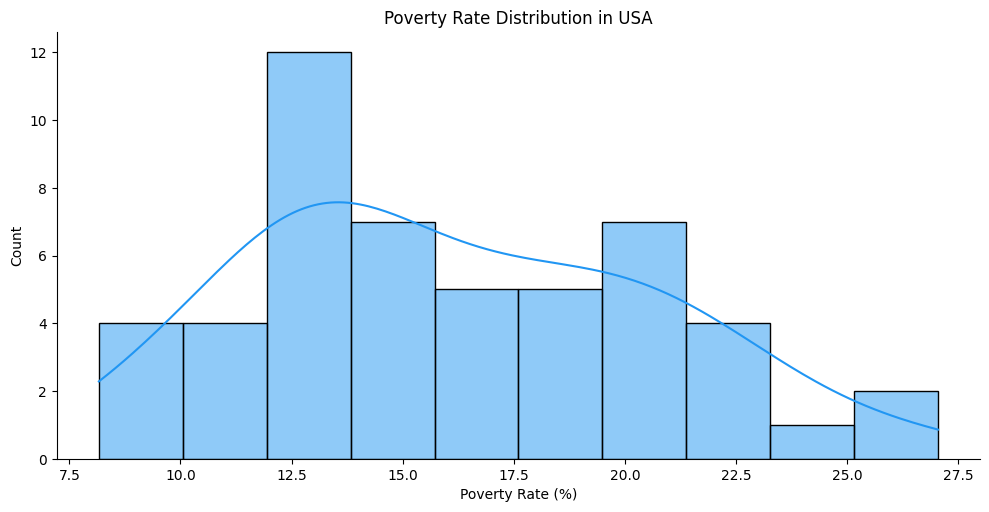

In [21]:
# Visualize the poverty rate distribution
sns.displot(data=avg_poverty_state,
            x="poverty_rate",
            kind="hist",
            bins=10,
            aspect=2,
            kde=True,
            color='#2196f3')

plt.title("Poverty Rate Distribution in USA")
plt.xlabel("Poverty Rate (%)")

plt.show()

In [22]:
fig = px.bar(x = avg_poverty_state["Geographic Area"],
             y= avg_poverty_state["poverty_rate"],
             title="Poverty Rate by State",
             hover_name=avg_poverty_state["Geographic Area"],
             color=avg_poverty_state["poverty_rate"],
             color_continuous_scale='Agsunset')
fig.update_layout(yaxis_title='Poverty Rate (%)',xaxis_title="US State", coloraxis_showscale=False)
fig.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [23]:
merged_df.head(5)

,Geographic Area,City,Median Income,poverty_rate,percent_completed_hs,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,11207,78.80,21.2,67.2,30.2,0,0,1.6
1,AL,Abbeville city,25615,29.10,69.1,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,42575,25.50,78.9,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,37083,30.70,81.4,99.1,0.1,0,0.1,0.4
4,AL,Akron town,21667,42.00,68.6,13.2,86.5,0,0,0.3


In [24]:
merged_df.percent_completed_hs.value_counts()

100     1284
-        191
91.7     170
92.9     169
92.5     166
        ... 
39.7       1
39.3       1
20.1       1
27.2       1
43.9       1
Name: percent_completed_hs, Length: 726, dtype: int64

In [25]:
# Substituting the "-" empty values by "0"
merged_df['percent_completed_hs'] = merged_df['percent_completed_hs'].replace('-', 0)
# Converting to numeric dtype so we can plot and treat the values as float64
merged_df['percent_completed_hs'] = pd.to_numeric(merged_df['percent_completed_hs'])
merged_df["percent_completed_hs"].describe()

count   29,115.00
mean        85.17
std         13.68
min          0.00
25%         80.80
50%         88.30
75%         93.50
max        100.00
Name: percent_completed_hs, dtype: float64

In [26]:
avg_hs_grad = merged_df.groupby("Geographic Area", as_index = False).agg({"percent_completed_hs":pd.Series.mean})
avg_hs_grad.sort_values(by="percent_completed_hs", ascending=True, inplace=True)

In [27]:
fig = px.bar(x = avg_hs_grad["Geographic Area"],
             y= avg_hs_grad["percent_completed_hs"],
             title="High School Graduation Rate by State",
             hover_name=avg_hs_grad["Geographic Area"],
             color=avg_hs_grad["percent_completed_hs"],
             color_continuous_scale='Agsunset')
fig.update_layout(yaxis_title='HS Graduation Rate (%)',xaxis_title="US State", coloraxis_showscale=False)
fig.show()

# About time to clean the data and do a quick comparison across all factors

In [28]:
# Got tired of cleaning and transforming each of the columns to numeric, so created a loop iterating over the columns to do that.

# Getting the column names in the merged_df DataFrame
columns = merged_df.columns
# Slice the index to remove the first two columns not containing numerical values 
# Converting the index (pd.Series) to a list data type so we can iterate over it 
col_list = (columns[2:]).to_list()

for column in col_list:
  # Substituting the "-" and "(X)" empty values by "0"
  merged_df[column] = merged_df[column].replace('(X)', 0)
  merged_df[column] = merged_df[column].replace('-', 0)
  # Removing "-", "+", "," present in some numerical values (i.e. 2,500-)
  merged_df[column] = merged_df[column].astype(str).str.replace("-","")
  merged_df[column] = merged_df[column].astype(str).str.replace("+","")
  merged_df[column] = merged_df[column].astype(str).str.replace(",","")
  # Converting to numeric dtype so we can plot and treat the values as float64
  merged_df[column] = pd.to_numeric(merged_df[column])
merged_df.describe()

<ipython-input-28-acdef2ed07e9>:15: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



,Median Income,poverty_rate,percent_completed_hs,share_white,share_black,share_native_american,share_asian,share_hispanic
count,"29,115.00","29,115.00","29,115.00","29,115.00","29,115.00","29,115.00","29,115.00","29,115.00"
mean,"48,019.41",16.33,85.17,83.16,6.84,2.88,1.54,9.28
std,"27,739.17",13.18,13.68,21.76,15.63,12.70,4.28,17.47
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"33,365.00",7.00,80.80,78.50,0.10,0.10,0.00,1.20
50%,"43,750.00",13.60,88.30,92.50,0.80,0.30,0.40,2.90
75%,"57,930.50",22.40,93.50,96.90,4.20,0.90,1.20,8.00
max,"250,000.00",100.00,100.00,100.00,100.00,100.00,67.10,100.00


The following pairplot will plot the relationship between all of the stats present in the columns (quick glance)

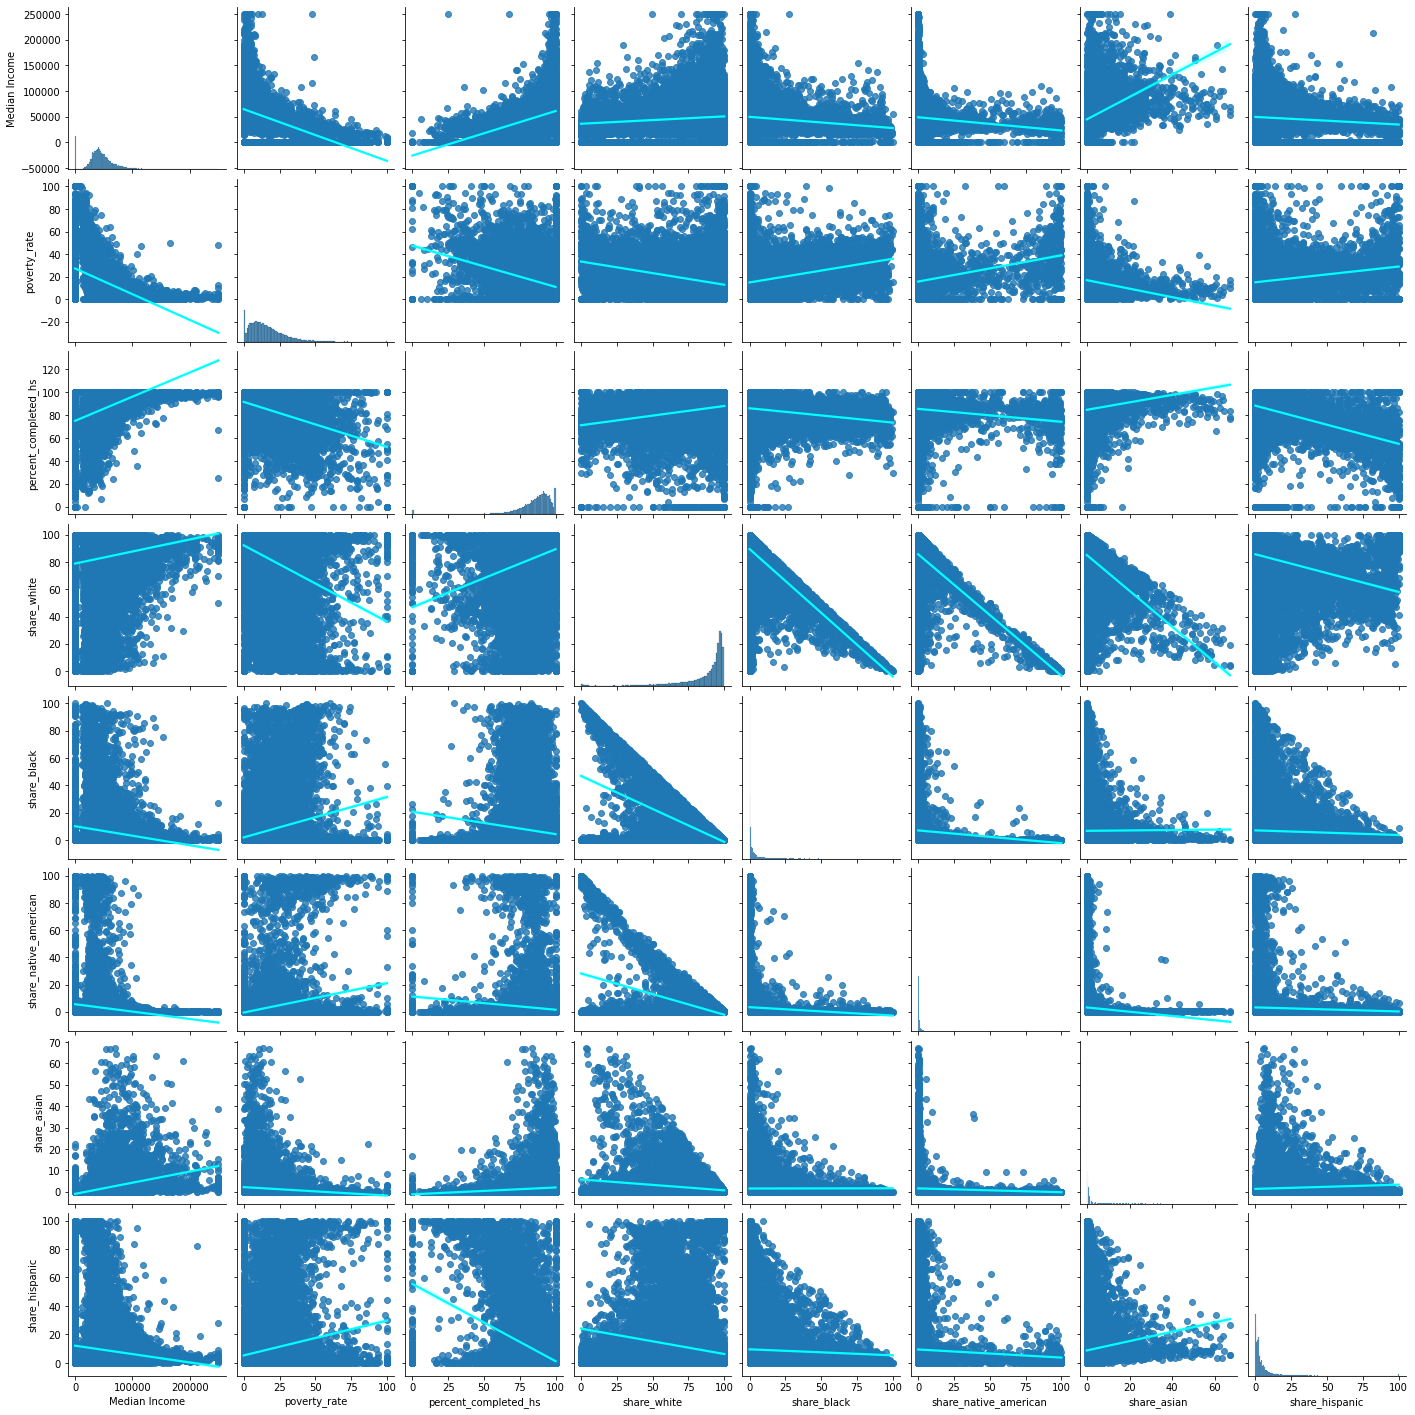

In [ ]:
sns.pairplot(merged_df, kind='reg', plot_kws={'line_kws':{'color': 'cyan'}})
plt.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [29]:
merged_avg_hs_pov_df = avg_hs_grad.merge(avg_poverty_state, how="inner", on="Geographic Area")
merged_avg_hs_pov_df.sort_values(by="poverty_rate", ascending=True, inplace=True)
merged_avg_hs_pov_df.head(5)



,Geographic Area,percent_completed_hs,poverty_rate
44,NJ,90.51,8.16
17,WY,83.96,9.11
48,CT,91.55,9.17
50,MA,91.98,9.59
28,MD,88.08,10.29


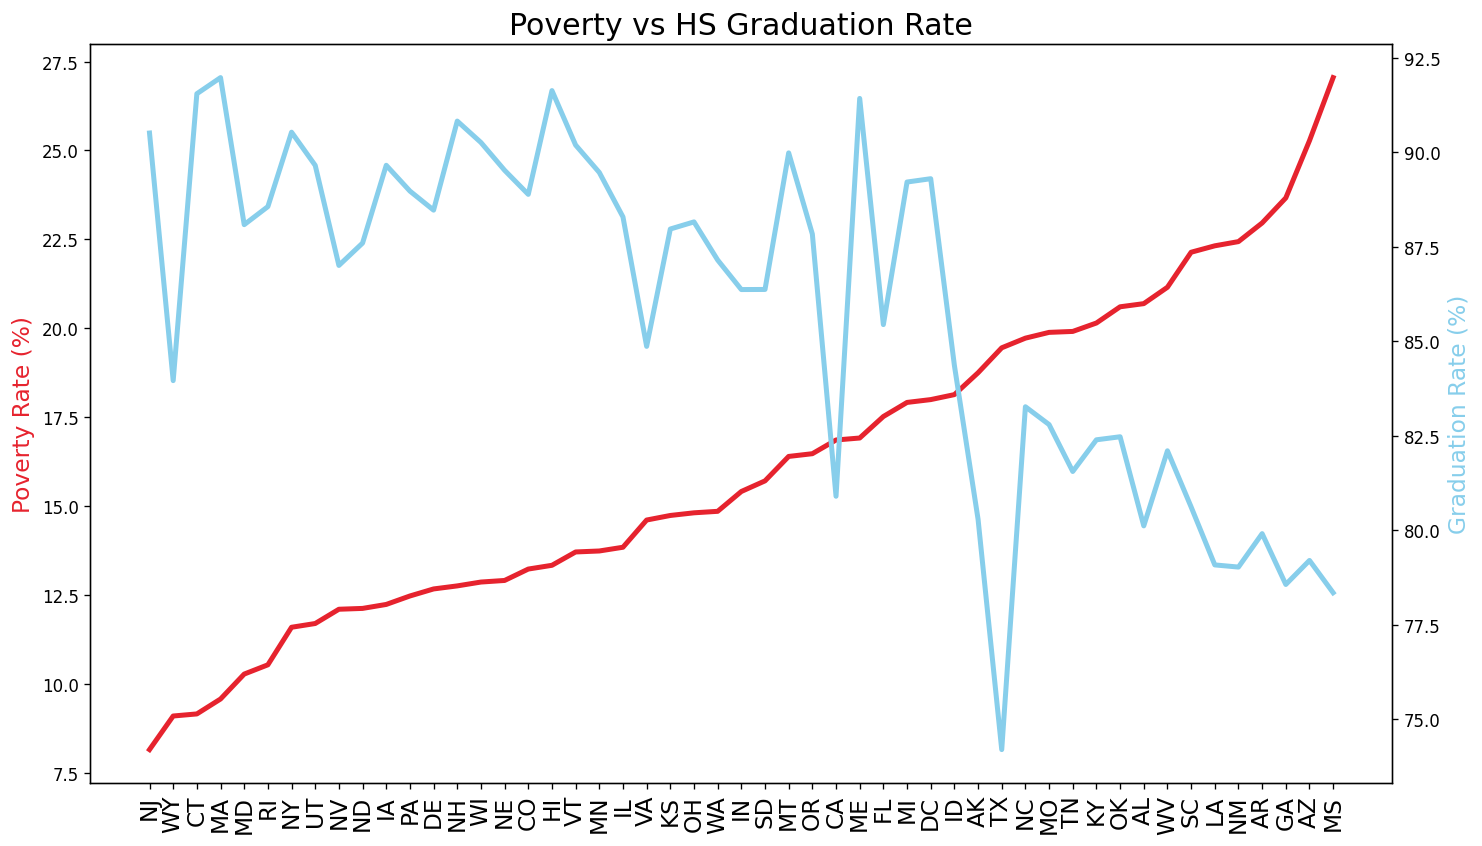

In [30]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Poverty vs HS Graduation Rate', fontsize=18)

# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=90)

# Get two y axis so we can plot rates separately 
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('Poverty Rate (%)', color='#E6232E', fontsize=14)
ax2.set_ylabel('Graduation Rate (%)', color='skyblue', fontsize=14)

ax1.plot(merged_avg_hs_pov_df["Geographic Area"], merged_avg_hs_pov_df["poverty_rate"], color='#E6232E', linewidth=3)
ax2.plot(merged_avg_hs_pov_df["Geographic Area"], merged_avg_hs_pov_df["percent_completed_hs"], color='skyblue', linewidth=3)
 
plt.show()

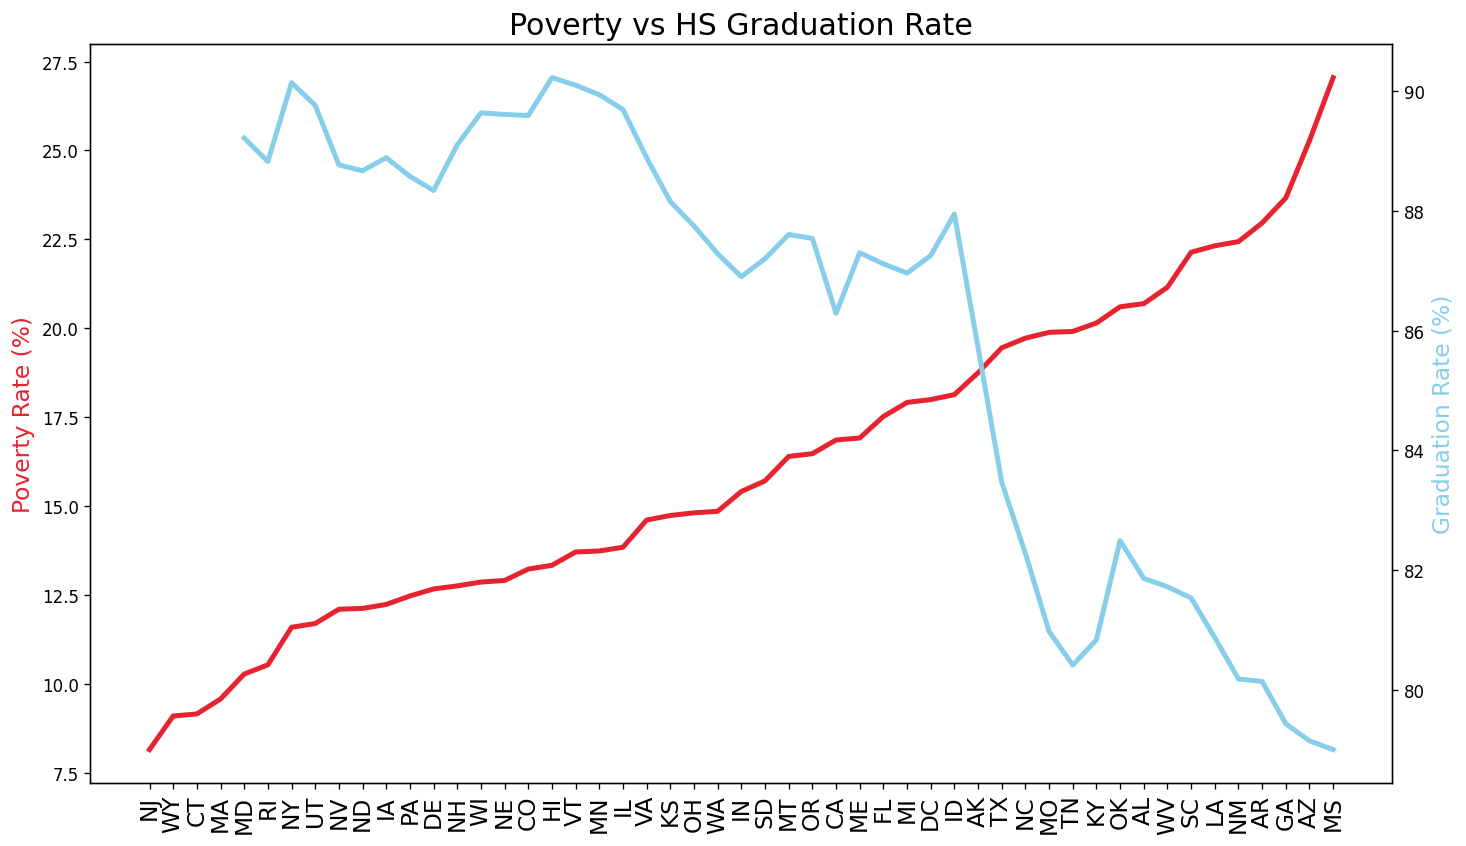

In [31]:
# Same graph but using a rolling average to see the tendency better in HS Graduation rate (smoother curve)
roll_df = merged_avg_hs_pov_df["percent_completed_hs"].rolling(window=5).mean()

plt.figure(figsize=(14,8), dpi=120)
plt.title('Poverty vs HS Graduation Rate', fontsize=18)

# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=90)

# Get two y axis so we can plot rates separately 
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('Poverty Rate (%)', color='#E6232E', fontsize=14)
ax2.set_ylabel('Graduation Rate (%)', color='skyblue', fontsize=14)

ax1.plot(merged_avg_hs_pov_df["Geographic Area"], merged_avg_hs_pov_df["poverty_rate"], color='#E6232E', linewidth=3)
ax2.plot(merged_avg_hs_pov_df["Geographic Area"], roll_df.values, color='skyblue', linewidth=3)
 
plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

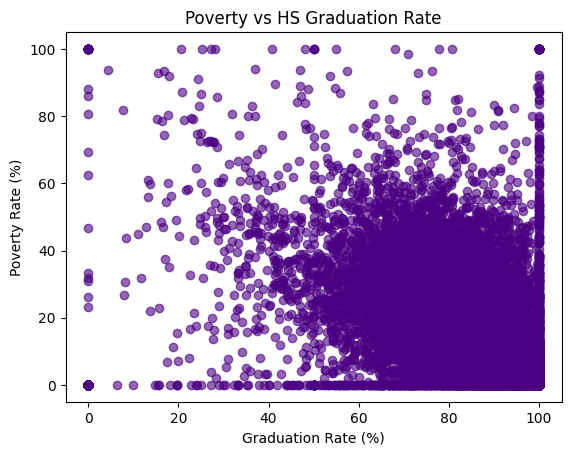

In [32]:
# Plot a scatterplot
plt.scatter(x=merged_df["percent_completed_hs"],
            y=merged_df["poverty_rate"],
            c='indigo',
            alpha=0.6)
plt.title('Poverty vs HS Graduation Rate', fontsize=12)

plt.xlabel("Graduation Rate (%)")
plt.ylabel("Poverty Rate (%)")

plt.show()

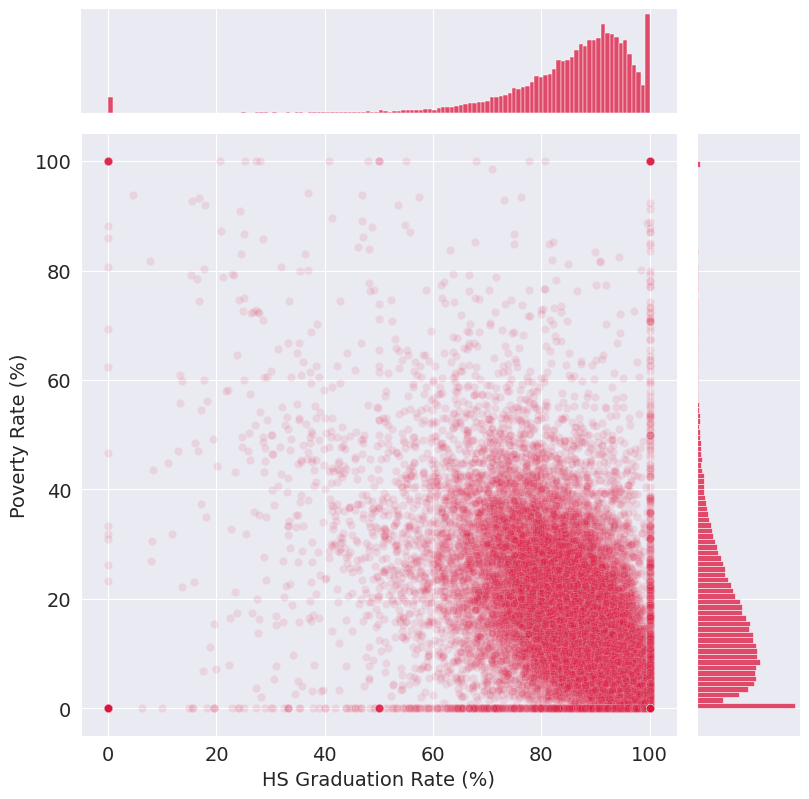

In [33]:
# Alternative scatterplot
with sns.axes_style("darkgrid"):
  sns.jointplot(x=merged_df["percent_completed_hs"],
                y=merged_df["poverty_rate"],
                height=8,
                kind="scatter",
                color="crimson",
                alpha= 0.1)

plt.xticks(size = 14)   
plt.yticks(size = 14)   
plt.xlabel("HS Graduation Rate (%)", size = 14)
plt.ylabel("Poverty Rate (%)", size = 14)

plt.show()

It looks like the alpha parameter is not supported in the regplot() function, which is used by sns.jointplot() when the kind parameter is set to "reg". To modify the transparency of the scatter plot in the joint plot, we can set the alpha parameter of the scatter_kws argument. Here's the modified code:

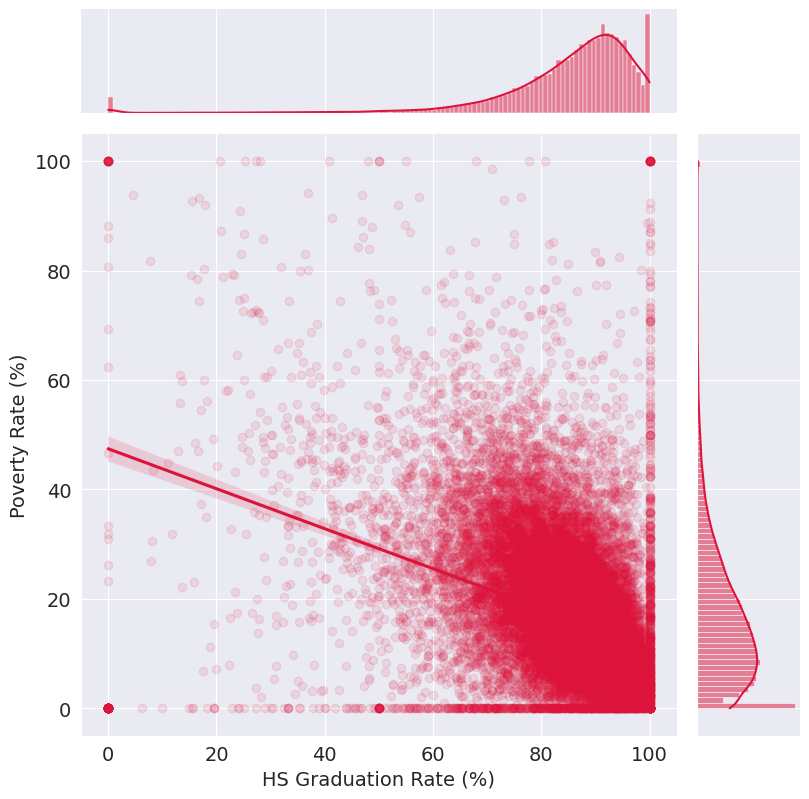

In [34]:
# Need to increase the transparency of each data point (scatter_kws) to be able to visualize the tendency reg line:

with sns.axes_style("darkgrid"):
  sns.jointplot(x=merged_df["percent_completed_hs"],
                y=merged_df["poverty_rate"],
                height=8,
                kind="reg",
                color="crimson",
                scatter_kws={"alpha": 0.1})
  
plt.xticks(size = 14)   
plt.yticks(size = 14)   
plt.xlabel("HS Graduation Rate (%)", size = 14)
plt.ylabel("Poverty Rate (%)", size = 14)

plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

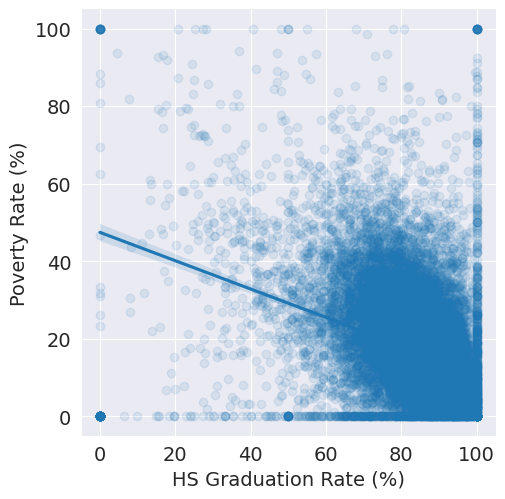

In [35]:
with sns.axes_style("darkgrid"):  
  sns.lmplot(data=merged_df, x="percent_completed_hs", y="poverty_rate", scatter_kws={"alpha": 0.1})

plt.xticks(size = 14)   
plt.yticks(size = 14)   
plt.xlabel("HS Graduation Rate (%)", size = 14)
plt.ylabel("Poverty Rate (%)", size = 14)

plt.show()

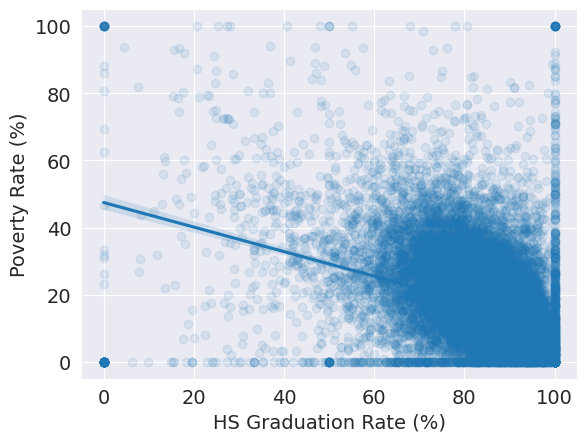

In [36]:
with sns.axes_style("darkgrid"):  
  sns.regplot(data=merged_df,
              x="percent_completed_hs",
              y="poverty_rate",
              scatter_kws={"alpha": 0.1},
              fit_reg = True)

plt.xticks(size = 14)   
plt.yticks(size = 14)   
plt.xlabel("HS Graduation Rate (%)", size = 14)
plt.ylabel("Poverty Rate (%)", size = 14)

plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [37]:
merged_df[merged_df['Geographic Area'] == "NM"]

,Geographic Area,City,Median Income,poverty_rate,percent_completed_hs,share_white,share_black,share_native_american,share_asian,share_hispanic
16305,NM,Abeytas CDP,0,0.00,100.00,82.10,0.00,0.00,0.00,58.90
16306,NM,Abiquiu CDP,0,0.00,100.00,46.80,0.00,9.10,0.00,92.20
16307,NM,Acomita Lake CDP,24250,43.20,84.00,3.40,0.00,93.30,0.00,3.10
16308,NM,Adelino CDP,45828,5.90,80.60,78.10,1.20,1.30,0.40,62.80
16309,NM,Agua Fria CDP,30342,36.40,77.10,69.40,0.40,1.60,0.50,79.30
...,...,...,...,...,...,...,...,...,...,...
16741,NM,Yah-ta-hey CDP,0,44.40,83.20,11.40,0.30,75.40,0.00,13.40
16742,NM,Young Place CDP,0,25.00,100.00,71.10,0.00,8.60,1.10,32.60
16743,NM,Youngsville CDP,21250,48.30,51.70,71.40,0.00,0.00,0.00,89.30
16744,NM,Zia Pueblo CDP,40000,25.40,84.50,0.10,0.00,99.50,0.00,2.00


In [38]:
# Groupby Geographical Area and aggregate the mean in multiple columns (race share)
avg_racial_ga = merged_df.groupby("Geographic Area", as_index = False)[["share_white", "share_black", "share_native_american", "share_asian", "share_hispanic"]].mean()
avg_racial_ga.head()

,Geographic Area,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AK,45.02,0.56,45.72,1.38,2.13
1,AL,72.47,23.36,0.66,0.48,2.98
2,AR,78.43,16.36,0.75,0.48,4.21
3,AZ,59.95,0.96,28.64,0.71,20.10
4,CA,71.66,2.68,1.72,5.53,29.39


In [39]:
# There is something weird with the data (by doing the mean we do not have into account the weight of each state city population to calculate the race share per US state). It would be as if each row would contain a city with the same population.
fig = px.bar(avg_racial_ga,
             x= "Geographic Area",
             y=["share_white", "share_black", "share_native_american", "share_asian", "share_hispanic"],
             labels = {'value':'Racial Share (%)'})
fig.show()

You can normalize the values of the given columns by dividing each cell by the sum of all values in the column, and then multiplying by 100.

In [40]:
# Normalize all data so the total share equals 100 (dirty trick)
cols_to_normalize = ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']
avg_racial_ga[cols_to_normalize] = avg_racial_ga[cols_to_normalize].div(avg_racial_ga[cols_to_normalize].sum(axis=1), axis=0) * 100


In [41]:
# Update the legend title and names
fig = px.bar(avg_racial_ga,
             x= "Geographic Area",
             y=["share_white", "share_black", "share_native_american", "share_asian", "share_hispanic"],
             labels = {'value':'Racial Share (%)'})
fig.show()


# Create Donut Chart of People Killed by Race

Hint: Use `.value_counts()`

In [42]:
deaths_by_race = df_fatalities["race"].value_counts()

# Convert the Series into a DataFrame
deaths_by_race = deaths_by_race.reset_index()

# Rename the columns to match the desired output
deaths_by_race.columns = ['Race', 'race_count']

# Rename the Race initial into full descriptions
deaths_by_race["Race"] = deaths_by_race["Race"].replace("W", "White")
deaths_by_race["Race"] = deaths_by_race["Race"].replace("B", "Black")
deaths_by_race["Race"] = deaths_by_race["Race"].replace("H", "Hispanic")
deaths_by_race["Race"] = deaths_by_race["Race"].replace("A", "Asian")
deaths_by_race["Race"] = deaths_by_race["Race"].replace("N", "Native American")
deaths_by_race["Race"] = deaths_by_race["Race"].replace("O", "Other")

deaths_by_race

,Race,race_count
0,White,1201
1,Black,618
2,Hispanic,423
3,Asian,39
4,Native American,31
5,Other,28


The following graph is a bit misleading, since it does not take into account the racial composition of the United States

In [43]:
# The following dictionary is created so we can maintain the color codes across graphical representations (using list comprehension)

colours = {'White': 'C0',
           'Black': 'C1',
           'Hispanic': 'C2',
           'Asian': 'C3',
           "Native American": "C4",
           "Other": "C5"}


In [44]:
fig = px.pie(labels=deaths_by_race["Race"],
             values=deaths_by_race["race_count"],
             title = "Number of people killed by race",
             names = deaths_by_race["Race"],
             hole = 0.6,
             color = [colours[key] for key in deaths_by_race["Race"]]
             )
fig.update_traces(textposition="outside", textinfo="percent+label")
fig.show()

In order to paint a more realistic picture one should take into account the race percentage of the United States population as a whole (will include that data into the deaths_by_race DataFrame)

In [45]:
deaths_by_race["race_percentage"] = [59.3, 13.8, 18.9, 6.1, 1.3, 0.6]

# Adjust race_count with race_percentage and create a new race_count_adj column
deaths_by_race["race_count_adj"] = deaths_by_race["race_count"] / deaths_by_race["race_percentage"]

# Drop the "Other Race" row to avoid overrepresentation
deaths_by_race = deaths_by_race.drop(deaths_by_race[deaths_by_race['Race'] == 'Other'].index)

deaths_by_race

,Race,race_count,race_percentage,race_count_adj
0,White,1201,59.30,20.25
1,Black,618,13.80,44.78
2,Hispanic,423,18.90,22.38
3,Asian,39,6.10,6.39
4,Native American,31,1.30,23.85


In [46]:
fig = px.pie(labels=deaths_by_race["Race"],
             values=deaths_by_race["race_count_adj"],
             title = "Number of people killed by race (adjusted to US race composition)",
             names = deaths_by_race["Race"],
             hole = 0.6,
             color = [colours[key] for key in deaths_by_race["Race"]]
             )
fig.update_traces(textposition="outside", textinfo="percent+label")
fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [47]:
deaths_by_sex = df_fatalities["gender"].value_counts()
# Convert the Series into a DataFrame
deaths_by_sex = deaths_by_sex.reset_index()

# Rename the columns to match the desired output
deaths_by_sex.columns = ['Sex', 'count']

# Rename the Race initial into full descriptions
deaths_by_sex["Sex"] = deaths_by_sex["Sex"].replace("M","Men")
deaths_by_sex["Sex"] = deaths_by_sex["Sex"].replace("F","Women")

deaths_by_sex

,Sex,count
0,Men,2428
1,Women,107


In [48]:
fig = px.pie(labels=deaths_by_sex["Sex"],
             values=deaths_by_sex["count"],
             title = "Number of people killed by sex",
             names = deaths_by_sex["Sex"],
             hole = 0.6
             )
fig.update_traces(textposition="outside", textinfo="percent+label")
fig.show()


# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [49]:
manner_of_death = df_fatalities.groupby(by=["manner_of_death", "gender"], as_index=False).agg({"name": pd.Series.count})
manner_of_death

,manner_of_death,gender,name
0,shot,F,102
1,shot,M,2261
2,shot and Tasered,F,5
3,shot and Tasered,M,167


In [50]:
fig = px.bar(manner_of_death,
             x="manner_of_death",
             y= "name",
             color= "gender")

fig.show()

In [51]:
age_of_death = df_fatalities.groupby(by=["age", "gender"], as_index=False).agg({"name": pd.Series.count})
age_of_death

,age,gender,name
0,6.00,M,1
1,12.00,F,1
2,13.00,M,1
3,14.00,M,1
4,15.00,M,8
...,...,...,...
112,80.00,M,1
113,82.00,M,2
114,83.00,M,2
115,86.00,M,2


In [52]:
fig = px.bar(age_of_death,
             x="age",
             y= "name",
             color= "gender")

fig.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [53]:
armed = df_fatalities["armed"].value_counts()

In [54]:
fig = px.pie(labels=armed.index[:10],
             values=armed.values[:10],
             title = "Number of people killed by race (adjusted to US race composition)",
             names = armed.index[:10],
             hole = 0.6
             )
fig.update_traces(textposition="outside", textinfo="percent+label")
fig.show()

/usr/local/lib/python3.9/dist-packages/plotly/express/_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [55]:
age = armed = df_fatalities["age"].value_counts()
age = age.reset_index()
age.columns = ["age", "death_count"]
age

,age,death_count
0,25.00,103
1,36.00,91
2,31.00,85
3,24.00,83
4,29.00,83
...,...,...
68,6.00,1
69,14.00,1
70,80.00,1
71,12.00,1


In [56]:
# Create a new dataframe containing the death_count of people under 25 (not including 25)
under_25 = age[age["age"] < 25]
# Sum the death_count of each row
sum_under_25 = under_25.death_count.sum()

# Calculate the percentage over total deaths
perc_under_25 = round((sum_under_25 * 100) /len(df_fatalities), 2)

print(f"The percentage of deaths caused by the police to individuals below 25 years old accounts for {perc_under_25}% of total deaths")

The percentage of deaths caused by the police to individuals below 25 years old accounts for 17.75% of total deaths


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

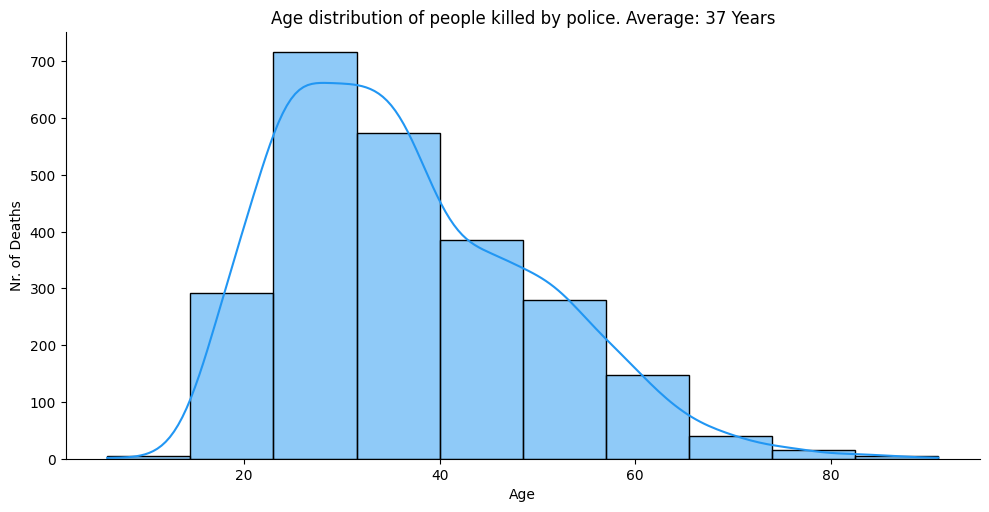

In [57]:
sns.displot(df_fatalities['age'],
            bins=10,
            aspect=2,
            kde=True, 
            color='#2196f3')

plt.title(f'Age distribution of people killed by police. Average: {round(df_fatalities.age.mean())} Years')
plt.xlabel('Age')
plt.ylabel('Nr. of Deaths')

plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

In [58]:
races = df_fatalities["race"].unique()

# Convert the array to a pandas Series
series = pd.Series(races)

# Find the indices of the NaN values
nan_indices = series.isnull()

# Use the boolean mask to extract the non-NaN values
result = races[~nan_indices]

print(result)

['A' 'W' 'H' 'B' 'O' 'N']


In this example, we first convert the NumPy ndarray to a pandas Series using pd.Series. We can then use the isnull function to create a boolean mask nan_indices that identifies the NaN values in the Series. Finally, we use the resulting mask to index arr to extract the non-NaN values.

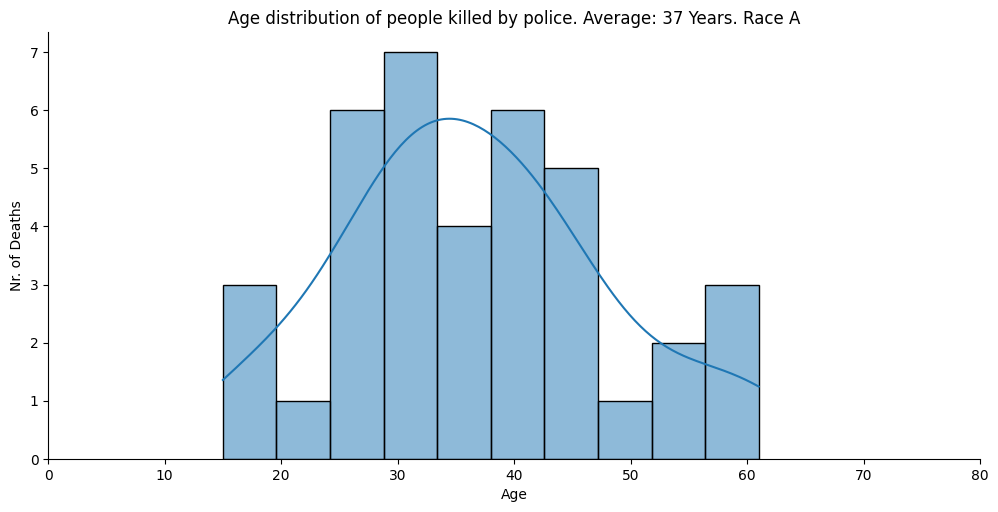

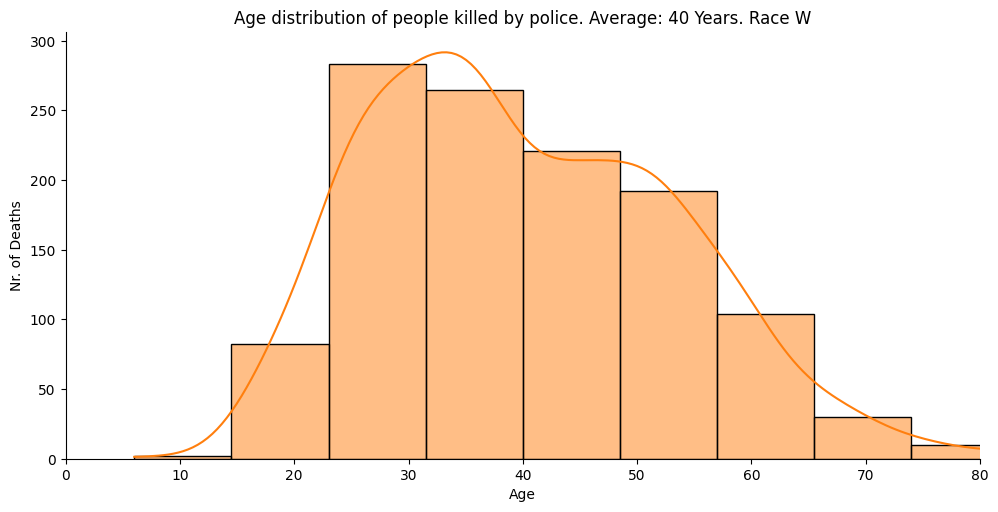

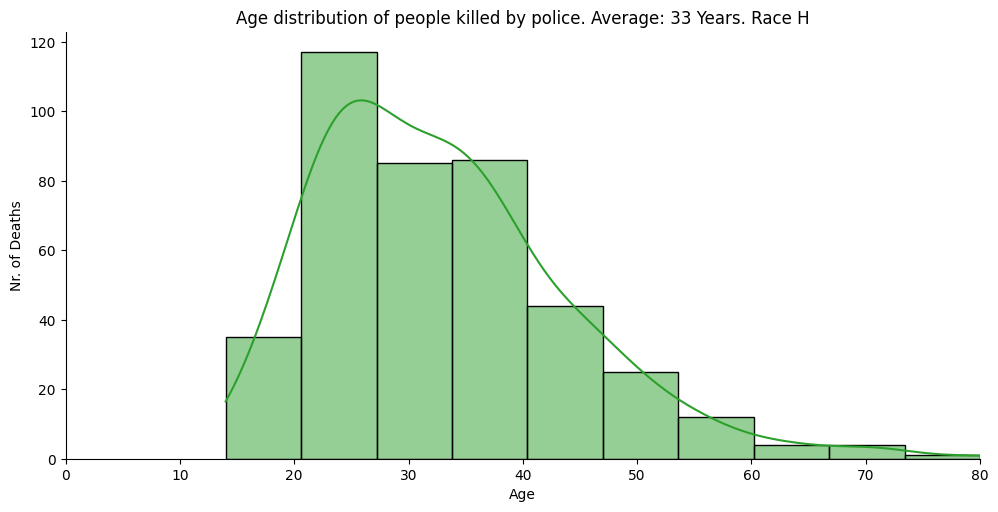

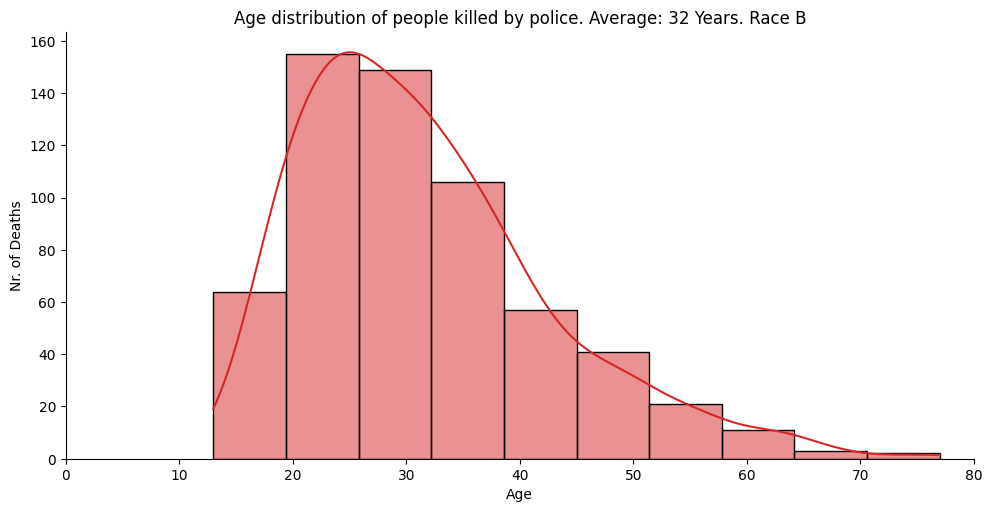

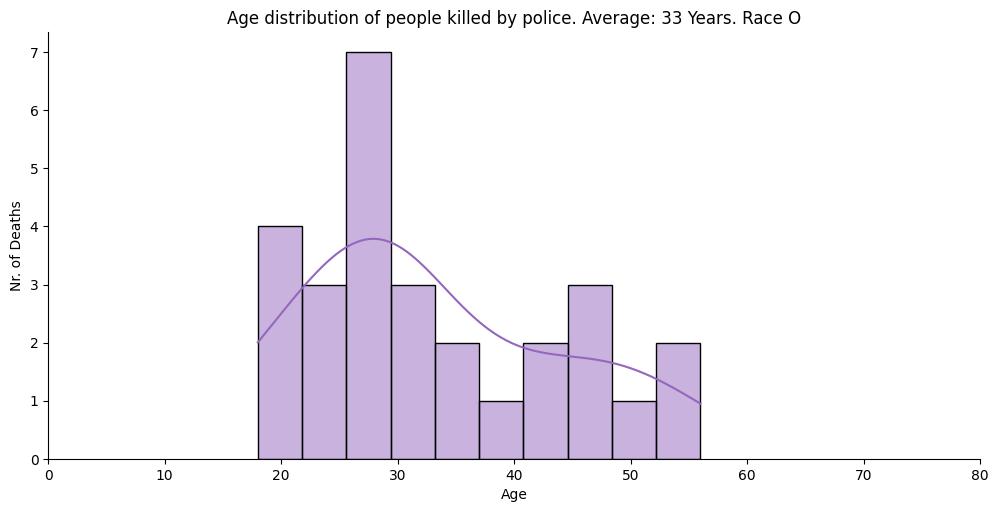

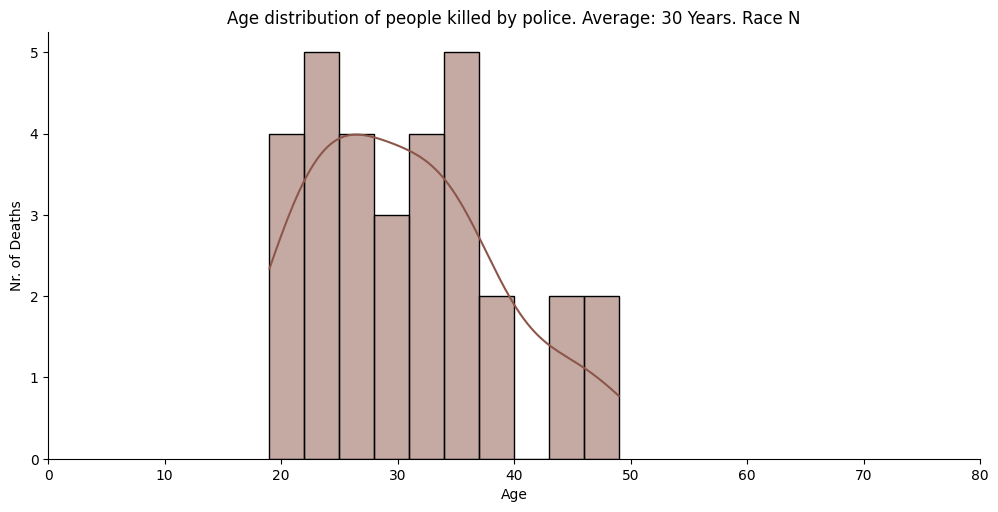

In [59]:
#Iterate over the array to generate all plots
col = 0
for race in result:
  try:
    df = df_fatalities[df_fatalities["race"] == race]
    ax = sns.displot(df['age'],
              bins=10,
              aspect=2,
              kde=True, 
              color=f'C{col}')
    ax.set(xlim=(0, 80)) # Set the x-axis limits
    col += 1 # Switch color in the next cycle
    plt.title(f"Age distribution of people killed by police. Average: {round(df.age.mean())} Years. Race {race}")
    plt.xlabel('Age')
    plt.ylabel('Nr. of Deaths')

    plt.show()
  except ValueError:
    pass

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [60]:
px.bar(deaths_by_race,
       x="race_count",
       y="Race")

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [61]:
mental = df_fatalities["signs_of_mental_illness"].value_counts()
mental

False    1902
True      633
Name: signs_of_mental_illness, dtype: int64

In [62]:
fig = px.pie(labels=mental.index,
             values=mental.values,
             title = "Mental Health Status of people killed by the Police True = Illness",
             names = mental.index,
             hole = 0.6
             )
fig.update_traces(textposition="outside", textinfo="percent+label")
fig.show()

/usr/local/lib/python3.9/dist-packages/plotly/express/_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [242]:
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


In [243]:
# This code below has an issue, it does aggregate data from cities in different states (cities with the same name)
# city = df_fatalities.city.value_counts()[:10]

In [78]:
# This code below has into account the state info
city = df_fatalities.groupby(by=["city","state"], as_index=False).agg({"name": pd.Series.count})
city.sort_values(by="name", ascending=False, inplace=True)
city = city[:10]
city

,city,state,name
805,Los Angeles,CA,39
1083,Phoenix,AZ,31
632,Houston,TX,26
262,Chicago,IL,25
758,Las Vegas,NV,21
1215,San Antonio,TX,20
310,Columbus,OH,17
886,Miami,FL,17
70,Austin,TX,16
1324,St. Louis,MO,15


In [64]:
fig = px.bar(x=city.city, y=city.name)
fig.update_layout(xaxis_title='City', yaxis_title='Nr. of Deaths')
fig.show()


# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In this code, we first define a list of cities to filter the rows from merged_df. We then use the isin method to check whether each value in the 'City' column of merged_df is present in the cities list. The result is a Boolean Series that can be used to index merged_df and extract only the rows that match the desired cities.

Finally, we use the copy method to create a new DataFrame that is a copy of the filtered rows, rather than a view of the original merged_df. This step is not strictly necessary but can be useful to avoid potential issues when modifying the new DataFrame.

In [79]:
mod_cities = []
for ciudad in city["city"]:
  city_mod = str(ciudad)+ " city"
  mod_cities.append(city_mod)

In [72]:
# Using list comprehension
mod_cities = [str(ciudad) + " city" for ciudad in city["city"]]


In [80]:
# Add the modified city names so I can merge
city["city_mod"] = mod_cities

#Rename columns so I can merge based on them later on
city.columns = ["city", "Geographic Area", "death_count", "City"]
city

,city,Geographic Area,death_count,City
805,Los Angeles,CA,39,Los Angeles city
1083,Phoenix,AZ,31,Phoenix city
632,Houston,TX,26,Houston city
262,Chicago,IL,25,Chicago city
758,Las Vegas,NV,21,Las Vegas city
1215,San Antonio,TX,20,San Antonio city
310,Columbus,OH,17,Columbus city
886,Miami,FL,17,Miami city
70,Austin,TX,16,Austin city
1324,St. Louis,MO,15,St. Louis city


In [81]:

top10_city_merged_df = city.merge(merged_df, how="inner", on=["Geographic Area","City"])
top10_city_merged_df.sort_values(by="death_count", ascending=False, inplace=True)
top10_city_merged_df.head(2)

,city,Geographic Area,death_count,City,Median Income,poverty_rate,percent_completed_hs,share_white,share_black,share_native_american,share_asian,share_hispanic
0,Los Angeles,CA,39,Los Angeles city,50205,22.10,75.50,49.80,9.60,0.70,11.30,48.50
1,Phoenix,AZ,31,Phoenix city,47326,23.10,80.70,65.90,6.50,2.20,3.20,40.80


In [82]:
top10_city_merged_df["Location"] = top10_city_merged_df["city"] + ", " + top10_city_merged_df["Geographic Area"]
top10_city_merged_df.head(2)

,city,Geographic Area,death_count,City,Median Income,poverty_rate,percent_completed_hs,share_white,share_black,share_native_american,share_asian,share_hispanic,Location
0,Los Angeles,CA,39,Los Angeles city,50205,22.10,75.50,49.80,9.60,0.70,11.30,48.50,"Los Angeles, CA"
1,Phoenix,AZ,31,Phoenix city,47326,23.10,80.70,65.90,6.50,2.20,3.20,40.80,"Phoenix, AZ"


In [85]:
# The problem of this stats is that hispanic contains also other races inside (including white), hence it does not add up to a 100

fig = px.bar(top10_city_merged_df, x="Location", y=["share_white", "share_black", "share_native_american", "share_asian", "share_hispanic"])
fig.update_layout(xaxis_title='City', yaxis_title='Racial distribution')
fig.show()

In [93]:
# Now do the same for the cities with the least crimes
city = df_fatalities.groupby(by=["city","state"], as_index=False).agg({"name": pd.Series.count})
city.sort_values(by="name", ascending=False, inplace=True)
city = city[-10:]

# Using list comprehension
mod_cities = [str(ciudad) + " city" for ciudad in city["city"]]

# Add the modified city names so I can merge
city["city_mod"] = mod_cities

#Rename columns so I can merge based on them later on
city.columns = ["city", "Geographic Area", "death_count", "City"]

top10_city_merged_df = city.merge(merged_df, how="inner", on=["Geographic Area","City"])
top10_city_merged_df.sort_values(by="death_count", ascending=False, inplace=True)
top10_city_merged_df["Location"] = top10_city_merged_df["city"] + ", " + top10_city_merged_df["Geographic Area"]

fig = px.bar(top10_city_merged_df, x="Location", y=["share_white", "share_black", "share_native_american", "share_asian", "share_hispanic"])
fig.update_layout(xaxis_title='City', yaxis_title='Racial distribution')
fig.show()


# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [112]:
killings_state = df_fatalities["state"].value_counts()

In [100]:
fig = px.choropleth(locations=killings_state.index,
                    locationmode="USA-states",
                    color=killings_state.values,
                    scope="usa",
                    hover_name=killings_state.index,
                    color_continuous_scale='matter',
                    title="Police Killings by US State")


fig.show()

In [106]:
poverty_state = merged_df.groupby("Geographic Area", as_index=False).agg({"poverty_rate": pd.Series.mean})

fig = px.choropleth(locations=poverty_state["Geographic Area"],
                    locationmode="USA-states",
                    color=poverty_state["poverty_rate"],
                    scope="usa",
                    hover_name=poverty_state["Geographic Area"],
                    color_continuous_scale='matter',
                    title="Poverty Rate by US State")


fig.show()

In [113]:
# Reformat into a DataFrame to merge afterwards based on the Geographic Area
killings_state = killings_state.reset_index()
killings_state.columns = ["Geographic Area", "Killings"]
killings_state.head()

,Geographic Area,Killings
0,CA,424
1,TX,225
2,FL,154
3,AZ,118
4,OH,79


In [115]:
# Merge into one frame the poverty and police killings to represent afterwards
poverty_pkillings = poverty_state.merge(killings_state, on="Geographic Area", how="inner")
poverty_pkillings.head(2)

,Geographic Area,poverty_rate,Killings
0,AK,18.75,15
1,AL,20.70,50


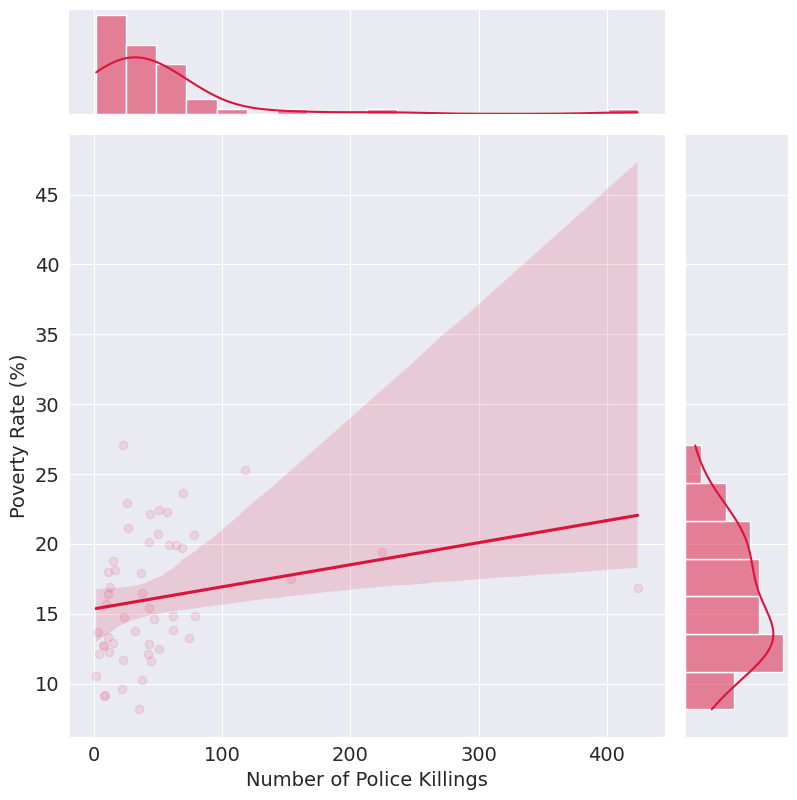

In [119]:
# Need to increase the transparency of each data point (scatter_kws) to be able to visualize the tendency reg line:

with sns.axes_style("darkgrid"):
  sns.jointplot(x=poverty_pkillings["Killings"],
                y=poverty_pkillings["poverty_rate"],
                height=8,
                kind="reg",
                color="crimson",
                scatter_kws={"alpha": 0.1})
  
plt.xticks(size = 14)   
plt.yticks(size = 14)   
plt.xlabel("Number of Police Killings", size = 14)
plt.ylabel("Poverty Rate (%)", size = 14)

plt.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [127]:
df_fatalities["date"] = pd.to_datetime(df_fatalities["date"])
df_fatalities["Year"] = df_fatalities["date"].dt.year
killings_per_year = df_fatalities["Year"].value_counts()
killings_per_year

2015    991
2016    963
2017    581
Name: Year, dtype: int64

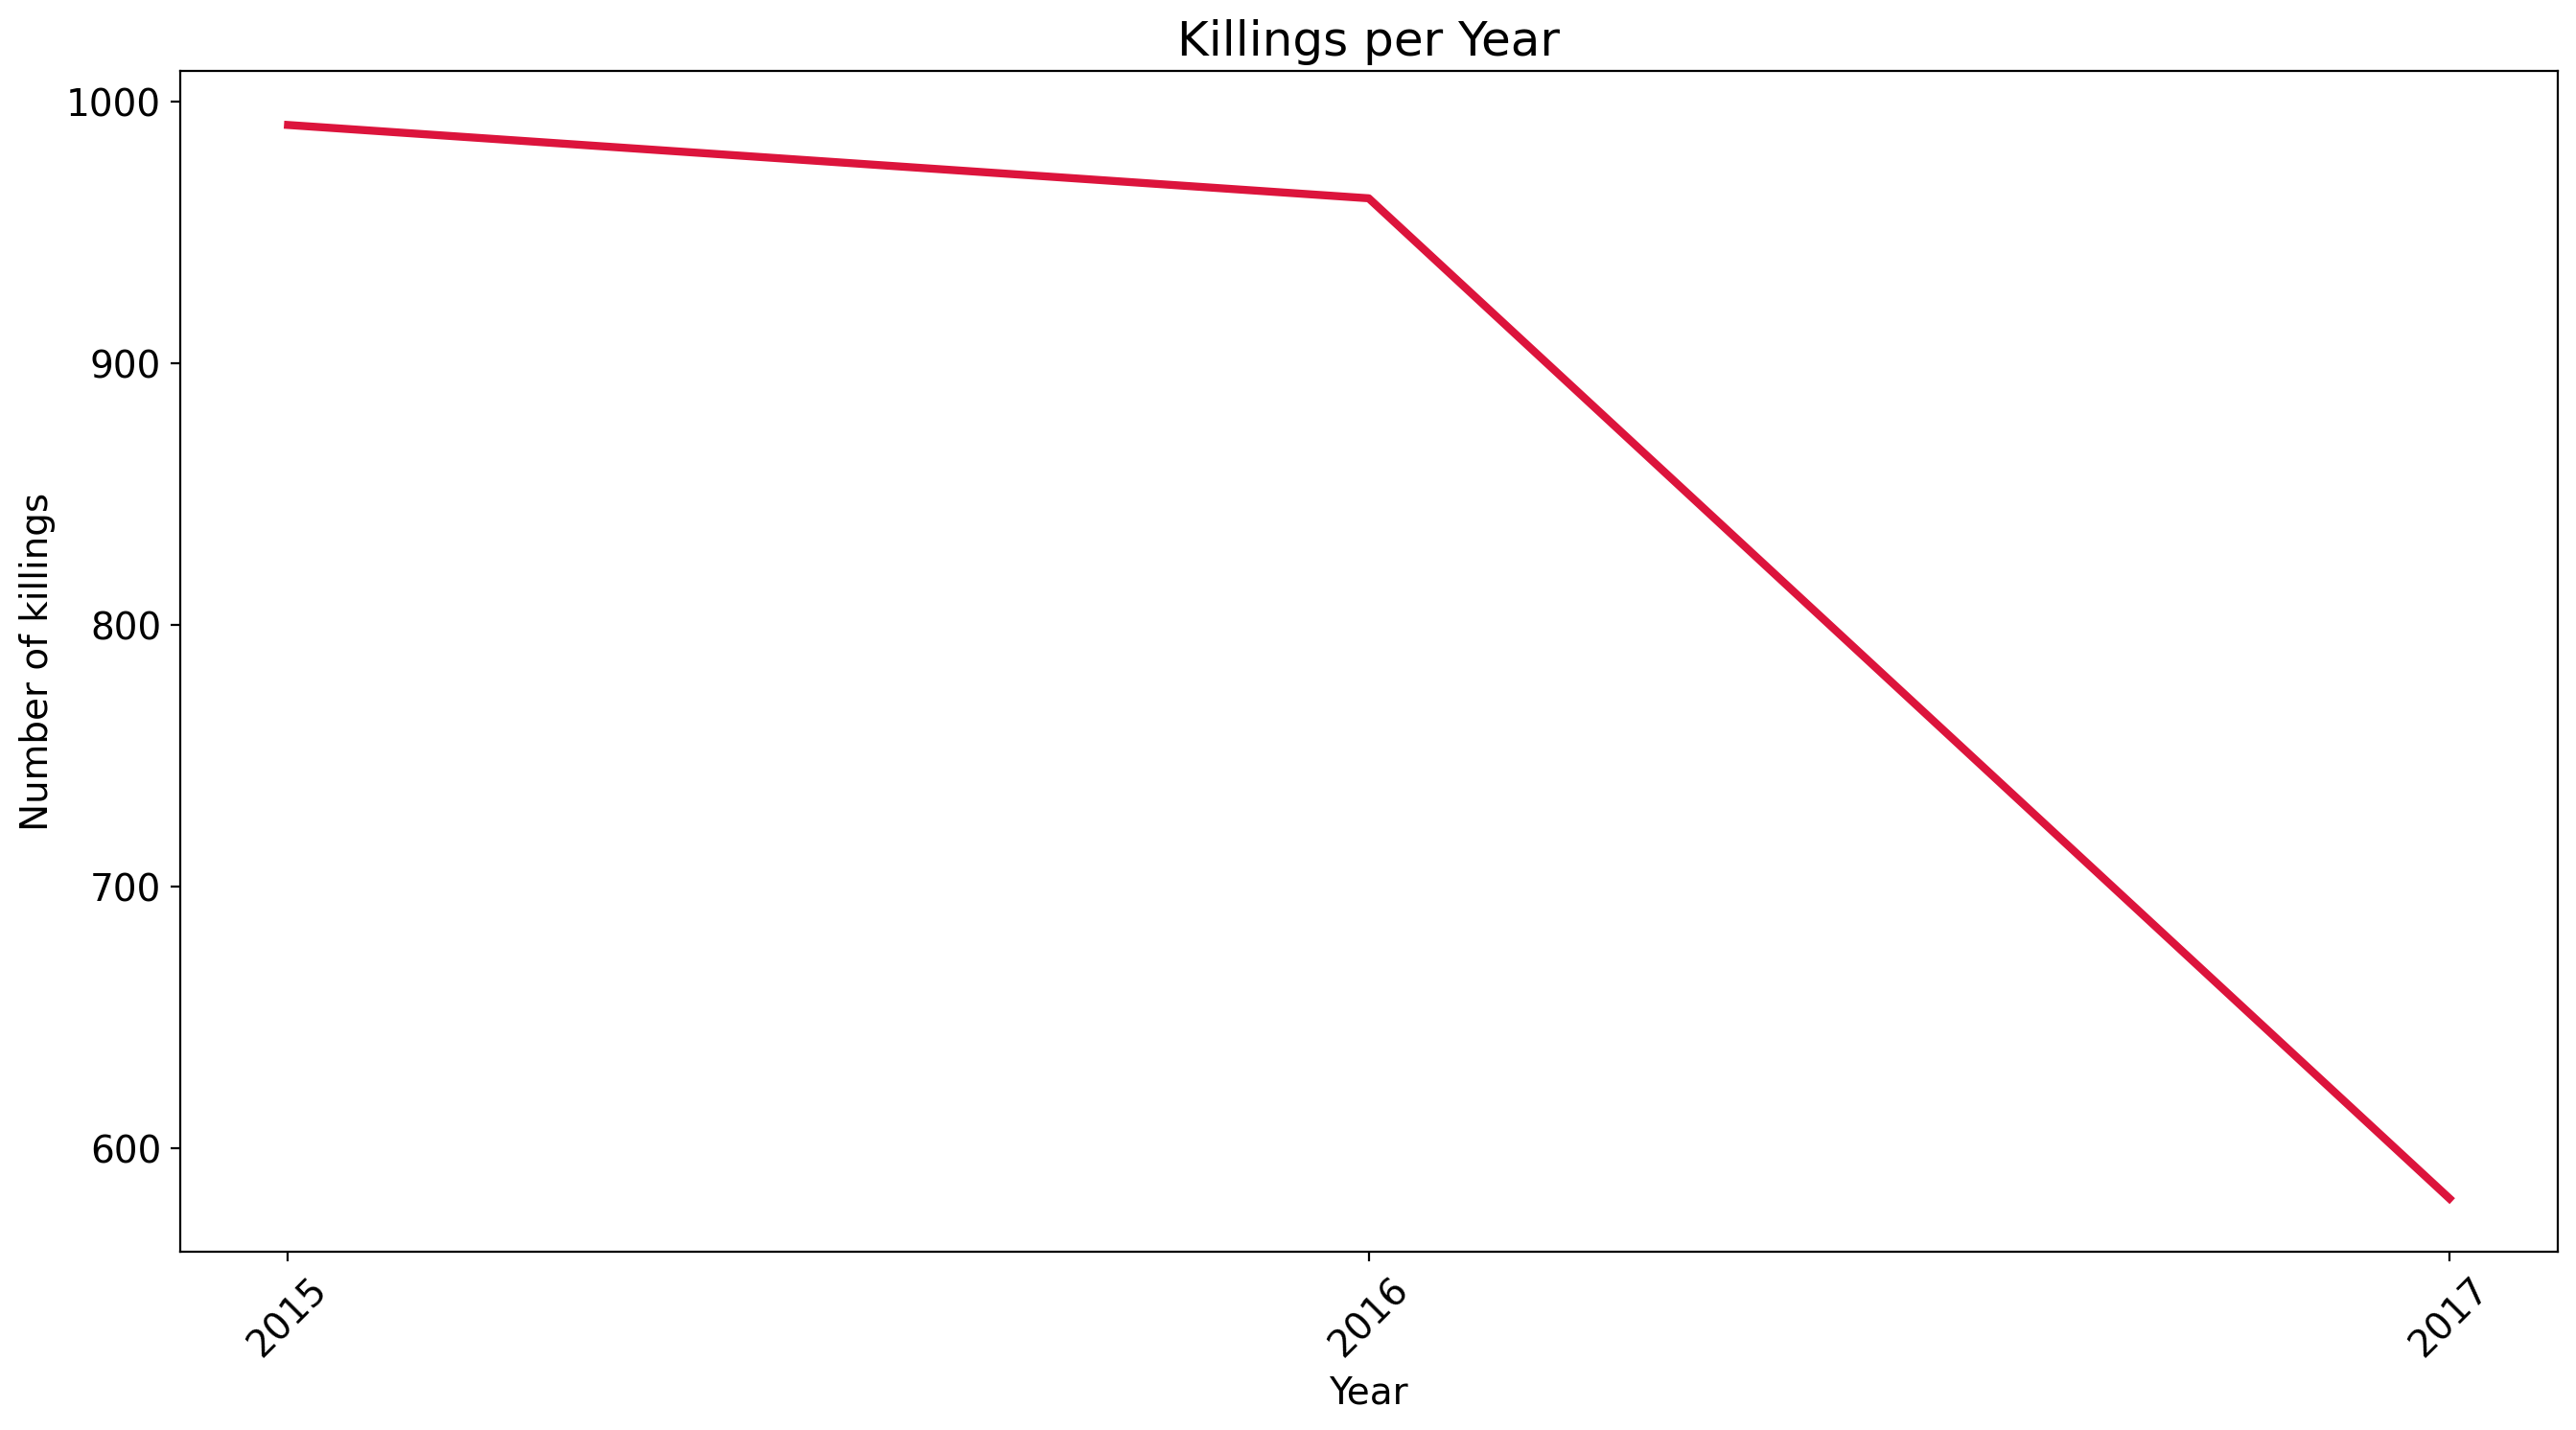

In [130]:
plt.figure(figsize=(16,8), dpi=200)

plt.title("Killings per Year", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of killings", fontsize=14)
plt.yticks(fontsize = 14) 

# Increase the size, rotate the labels on the x-axis and create 5-year tick marks
plt.xticks(ticks=np.arange(2015, 2018, step=1), fontsize=14, rotation=45)

plt.plot(killings_per_year.index,
         killings_per_year.values,
         color = "crimson",
         linewidth = 3)

plt.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).